# *PyMC3!!*

In [12]:
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PyMC3 is a package that is used for Bayesian inference. It is built on top of a package called `theano`. We may cover this eventually.

## Samplers

PyMC3 is most commonly used for MCMC (Markov Chain Monte Carlo) tools. The central focus of the package is the Model() object which builds a probabilistic model and which PyMC3 then *samples*. I italicize "samples" because PyMC3 also has several different MCMC samplers built into it. The sampler that we built in the MCMC intro was one of the originals, called a Metropolis-Hastings sampler.

You mentioned another where parameters randomly shift but only one at a time. That one is called a Gibbs sampler. This one is better for high-dimensional spaces where the gradient of the function shifts quickly in some directions.

However, for quick convergence the NUTS (No-U-Turn) sampler is often preferred. This one uses the gradient of the function to some extent in order to determine when the *trace* (that's another important word) starts to turn back on itself. The trace is the array that holds the values of every link in our Markov Chain.

## Basics of PyMC3's `Model()`

Let's say we want to use Bayesian inference to perform a regression analysis of a target variable. Simple, right?

It is with PyMC3!

First, let's design a hypothetical linear relationship and then let's get a random sample of our target variable.

In [3]:
# Intercept and coefficient
intercept = 10.
coef = 5.

# Observed values for the target variable
x_obs = np.random.normal(loc=10., scale=3., size=10_000)
noise = np.random.normal(loc=0., scale=1., size=10_000)
y_obs = intercept + coef * x_obs + noise

Awesome! Now we can build a model with pm.Model(). With this, we can tell the computer what we think is happening behind the scenes and give it our priors. We use a `with` block to tell PyMC3 what model we are describing and we sample inside the sample block. When we sample, we will get a posterior distribution (remember MCMC approximates a probability distribution) for all of the parameters we put in for the distribution of our target variable.

As is most common in linear regression, we will assume that the target variable is normally distributed around the linear relationship. This means that we will have to give two priors for the target's parameters. Mu $\mu$ will be the expected value of $y = \beta_0 + \beta_1 \cdot x$. Sigma $\sigma$ will be the standard deviation of the residuals. But of course, it wouldn't be any fun to put the exact values in, so we will put priors for the uncertain terms involved.

<ipython-input-9-151cd608b039>:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [noise, coef, intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 63 seconds.
The acceptance probability does not match the target. It is 0.8960660022550735, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9380052848602232, but should be close to 0.8. Try to increase the number of tuning steps.
<ipython-input-9-151cd608b039>:14: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace, ['intercept','coef','noise'])


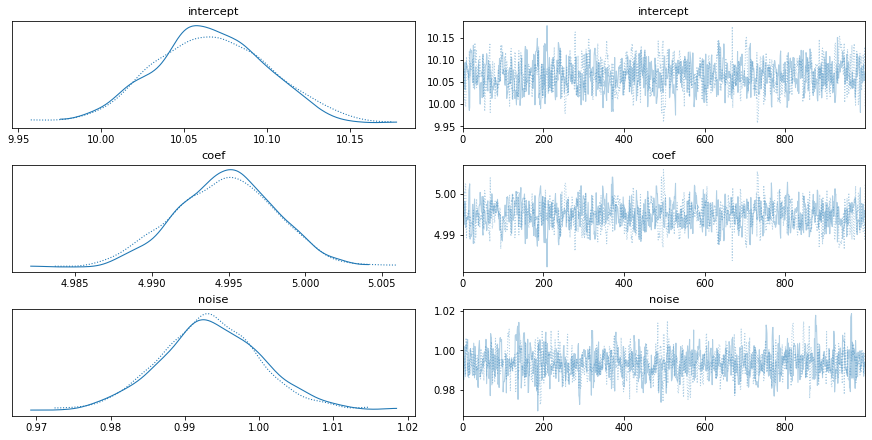

In [9]:
# Standard convention uses a with block to instantiate and describe a model
with pm.Model() as exp1:
    # The coefficient, intercept, and average magnitude of the noise are unknown to us
    # So here we define our priors
    interc = pm.Normal('intercept', mu=0., sigma=5.)
    coeff = pm.Normal('coef', mu=3., sigma=2.)
    
    sigma = pm.HalfNormal('noise', sigma=0.5)
    
    y = pm.Normal('target', mu=coeff*x_obs + interc, sigma=sigma, observed=y_obs)
    
    trace = pm.sample(1000)
    
    pm.traceplot(trace, ['intercept','coef','noise'])
    plt.show()

Not bad, right?

PyMC3 will default to a NUTS sampler most of the time, but using a different one is as easy including one line of code.

<ipython-input-10-4b46175f5b1d>:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, step=step)
Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Slice: [noise]
>Slice: [coef]
>Slice: [intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 33 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.
<ipython-input-10-4b46175f5b1d>:14: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace, ['intercept','coef','noise'])


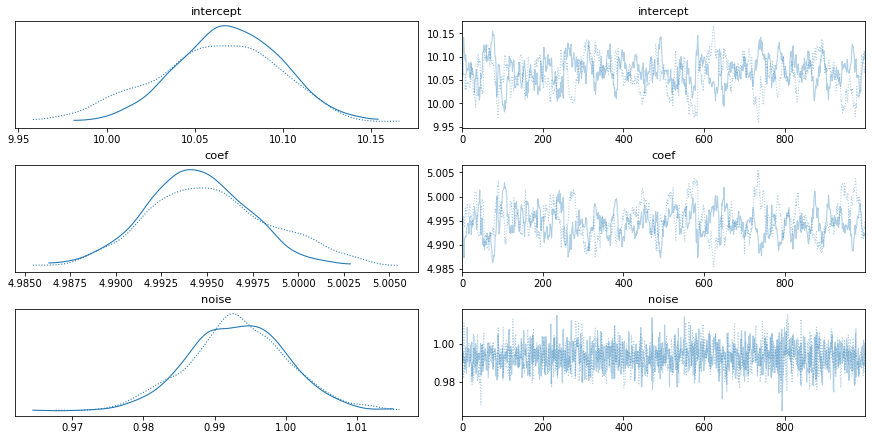

In [10]:
with pm.Model() as exp1:
    # The coefficient, intercept, and average magnitude of the noise are unknown to us
    # So here we define our priors
    interc = pm.Normal('intercept', mu=0., sigma=5.)
    coeff = pm.Normal('coef', mu=3., sigma=2.)
    
    sigma = pm.HalfNormal('noise', sigma=0.5)
    
    y = pm.Normal('target', mu=coeff*x_obs + interc, sigma=sigma, observed=y_obs)
    
    step = pm.Slice()
    trace = pm.sample(1000, step=step)
    
    pm.traceplot(trace, ['intercept','coef','noise'])
    plt.show()

This same problem can be done even more easily using the GLM submodule inside PyMC3

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
<ipython-input-16-9596ecbfb42b>:6: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1500)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, x, Intercept]


Sampling 2 chains for 1_000 tune and 1_500 draw iterations (2_000 + 3_000 draws total) took 122 seconds.
The acceptance probability does not match the target. It is 0.9045149791298795, but should be close to 0.8. Try to increase the number of tuning steps.
<ipython-input-16-9596ecbfb42b>:8: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace,['sd','x','Intercept'])


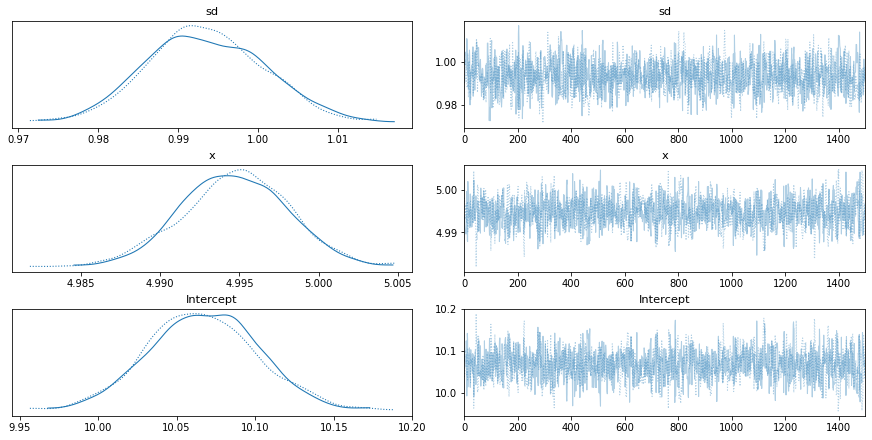

In [16]:
from pymc3.glm import GLM

df = pd.DataFrame({'y': y_obs, 'x': x_obs})
with pm.Model() as model_glm:
    GLM.from_formula("y ~ x", df)
    trace = pm.sample(1500)
#     pm.Metropolis()
    pm.traceplot(trace,['sd','x','Intercept'])

More resources can be found at these links:
* Getting Started page - https://docs.pymc.io/notebooks/getting_started.html
* Different sampling/step methods - https://docs.pymc.io/notebooks/sampling_compound_step.html
* Inference doc (warning: very dry) - https://docs.pymc.io/api/inference.html